<hr>
<h3> <img src="alzheimer1.png" width="40" height="40"> Alzheimer's Disease Diagnosis || What are the reasons that lead to Alzheimer?</h3>
<hr>
Alzheimer's Disease (AD) is a progressive neurodegenerative disorder that impacts memory, thinking, and behavior.<br> 
Early and accurate diagnosis is critical to manage and slow the progression of the disease. <br>
Challenges associated with Alzheimer's diagnosis include:<br>

- Difficulty in identifying early symptoms.<br>
- Dependence on multiple factors such as lifestyle, health conditions, and genetics.<br>
- High cost and time required for advanced diagnostic procedures.<br>
- Emotional and financial strain on patients and families.<br><br>

Before diving into data analysis, it is important to frame the business and research questions.<br>
These questions ensure clarity and guide the development of meaningful solutions to the problem.<br>


<hr>
<h3>📌 Key Questions to Address:</h3>
<hr>
<br>

1. What factors contribute most to the diagnosis of Alzheimer's disease?

2. How can early detection be improved using available patient data?

3. What is the business or societal value of improving Alzheimer's diagnosis?

4. Can the model aid healthcare providers in decision-making and reduce diagnostic errors?

5. Which demographic or health-related attributes are most at risk?

<h2> <img src="goal.png" width="30" height="30"> Goal</h2>

Alzheimer’s Disease has a significant impact on individuals and society. <br>
By identifying patterns and key indicators in patients, healthcare providers can:<br>

- Develop proactive screening tools.<br>

- Personalize treatment plans.<br>

- Improve patient outcomes.<br>

In this case study, I will explore the key drivers of Alzheimer’s diagnosis using patient data.<br> 
This analysis aims to support healthcare professionals in strengthening diagnostic accuracy and implementing preventative strategies.<br>




<h2><img src="overview.png" width="30" height="30"> Data Overview</h2>
In this analysis, I will utilize a dataset related to Alzheimer’s diagnosis, which contains information on nearly 2150 patients. <br>
The dataset includes attributes spanning demographic, lifestyle, and medical data. Below is a summary of the dataset attributes:<br>

In [3]:
import pandas as pd
import plotly.express as px
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.options.display.float_format= '{:,.2f}'.format
sns.set()

import warnings


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [4]:
df = pd.read_csv('alzheimers_modified_data.csv')

In [5]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749230993864,0,13.29721772827684,6.327112473553353,1.3472143059081076,9.025678665766115,0,0,1,1,0,0,142,72,242.3668396963656,56.15089696091113,33.68256349839592,162.18914307736603,21.46353236431666,6.518876973217633,0,0,1.7258834599441897,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.82768119159602,0,4.542523817722191,7.619884540163032,0.5187671386507053,7.151292743051223,0,0,0,0,0,0,115,64,231.16259501016503,193.4079955157258,79.02847731570753,294.63090921495643,20.61326730888292,7.118695504189474,0,0,2.5924241326736475,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882442817113,0,19.55508452555359,7.844987790974517,1.826334664579784,9.673574157961111,1,0,0,0,0,0,99,116,284.1818577646338,153.3227621844376,69.77229186479597,83.63832413899468,7.356248624670334,5.895077345354194,0,0,7.119547742738579,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.80081704413547,1,12.209265546203785,8.428001350491492,7.43560414000302,8.392553685350862,0,0,0,0,0,0,118,115,159.58223960561193,65.36663683521382,68.45749070794797,277.5773575001914,13.991127243891668,8.965106303658107,0,1,6.48122585936608,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716973826446807,0,18.45435609061961,6.310460689360432,0.7954975089177474,5.597237677578526,0,0,0,0,0,0,94,117,237.6021836280377,92.8696998816807,56.87430466708379,291.1987801806695,13.517608895586092,6.045038774287464,0,0,0.014691221285652,0,0,1,1,0,0,XXXConfid


In [6]:
df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace = True)

In [7]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').fillna(df['Age'].mode()[0]).astype(int)

df['Gender'] = pd.to_numeric(df['Gender'], errors='coerce').fillna(df['Gender'].mode()[0]).astype(int)
df['EducationLevel'] = pd.to_numeric(df['EducationLevel'], errors='coerce').fillna(df['EducationLevel'].mode()[0]).astype(int)
df['BMI'] = pd.to_numeric(df['BMI'], errors='coerce').astype(float)
df['BMI']=df['BMI'].fillna(df['BMI'].mean())
df['Smoking'] = pd.to_numeric(df['Smoking'], errors='coerce').fillna(df['Smoking'].mode()[0]).astype(int)
df['AlcoholConsumption'] = pd.to_numeric(df['AlcoholConsumption'], errors='coerce').astype(float)
df['AlcoholConsumption']=df['AlcoholConsumption'].fillna((df['AlcoholConsumption'].mean()))
df['PhysicalActivity'] = pd.to_numeric(df['PhysicalActivity'], errors='coerce').astype(float)
df['PhysicalActivity']=df['PhysicalActivity'].fillna((df['PhysicalActivity'].mean()))
df['DietQuality'] = pd.to_numeric(df['DietQuality'], errors='coerce')
df['DietQuality']=df['DietQuality'].fillna(df['DietQuality'].mean())
df['SleepQuality'] = pd.to_numeric(df['SleepQuality'], errors='coerce')
df['SleepQuality']=df['SleepQuality'].fillna(df['SleepQuality'].mean())
df['FamilyHistoryAlzheimers'] = pd.to_numeric(df['FamilyHistoryAlzheimers'], errors='coerce').fillna(df['FamilyHistoryAlzheimers'].mode()[0]).astype(int)
df['CardiovascularDisease'] = pd.to_numeric(df['CardiovascularDisease'], errors='coerce').fillna(df['CardiovascularDisease'].mode()[0]).astype(int)
df['Diabetes'] = pd.to_numeric(df['Diabetes'], errors='coerce').fillna(df['Diabetes'].mode()[0]).astype(int)
df['Depression'] = pd.to_numeric(df['Depression'], errors='coerce').fillna(df['Depression'].mode()[0]).astype(int)
df['HeadInjury'] = pd.to_numeric(df['HeadInjury'], errors='coerce').fillna(df['HeadInjury'].mode()[0]).astype(int)
df['Hypertension'] = pd.to_numeric(df['Hypertension'], errors='coerce').fillna(df['Hypertension'].mode()[0]).astype(int)
#Clinical Measurements
df['SystolicBP'] = pd.to_numeric(df['SystolicBP'], errors='coerce')

df['DiastolicBP'] = pd.to_numeric(df['DiastolicBP'], errors='coerce')
df['CholesterolHDL'] = pd.to_numeric(df['CholesterolHDL'], errors='coerce')
df['CholesterolLDL'] = pd.to_numeric(df['CholesterolLDL'], errors='coerce')
df['CholesterolTotal'] = pd.to_numeric(df['CholesterolTotal'], errors='coerce')
df['CholesterolTriglycerides'] = pd.to_numeric(df['CholesterolTriglycerides'], errors='coerce')
#Cognitive and Functional Assessments
df['MMSE'] = pd.to_numeric(df['MMSE'], errors='coerce')
df['FunctionalAssessment'] = pd.to_numeric(df['FunctionalAssessment'], errors='coerce')
df['MemoryComplaints'] = pd.to_numeric(df['MemoryComplaints'], errors='coerce').fillna(df['MemoryComplaints'].mode()[0]).astype(int)
df['BehavioralProblems'] = pd.to_numeric(df['BehavioralProblems'], errors='coerce').fillna(df['BehavioralProblems'].mode()[0]).astype(int)
df['ADL'] = pd.to_numeric(df['ADL'], errors='coerce')
df['ADL'].fillna(df['ADL'].mean(), inplace=True)
#Symptoms
df['Confusion'] = pd.to_numeric(df['Confusion'], errors='coerce').fillna(df['Confusion'].mode()[0]).astype(int)
df['Disorientation'] = pd.to_numeric(df['Disorientation'], errors='coerce').fillna(df['Disorientation'].mode()[0]).astype(int)
df['PersonalityChanges'] = pd.to_numeric(df['PersonalityChanges'], errors='coerce').fillna(df['PersonalityChanges'].mode()[0]).astype(int)
df['DifficultyCompletingTasks'] = pd.to_numeric(df['DifficultyCompletingTasks'], errors='coerce').fillna(df['DifficultyCompletingTasks'].mode()[0]).astype(int)
df['Forgetfulness'] = pd.to_numeric(df['Forgetfulness'], errors='coerce').fillna(df['Forgetfulness'].mode()[0]).astype(int)
#Diagnosis Information
df['Diagnosis'] = pd.to_numeric(df['Diagnosis'], errors='coerce').fillna(df['Diagnosis'].mode()[0]).astype(int)

C:\Users\aaaa\AppData\Local\Temp\ipykernel_2748\2587789565.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ADL'].fillna(df['ADL'].mean(), inplace=True)


TO handeling the outliers and nulls

In [8]:
df['SystolicBP'].fillna(155, inplace=True)
df['SystolicBP']=df['SystolicBP'].apply(lambda x: 155  if x<90 or x>180 else x )
df['DiastolicBP']=df['DiastolicBP'].apply(lambda x: 61  if x<60 or x>120 else x )
df['DiastolicBP'].fillna(61, inplace=True)
df['CholesterolHDL']=df['CholesterolHDL'].apply(lambda x: df['CholesterolHDL'].mean()  if x<20.0 or x>100.0 else x )
df['CholesterolHDL'].fillna(df['CholesterolHDL'].mean(), inplace=True)
df['CholesterolTotal']=df['CholesterolTotal'].apply(lambda x: df['CholesterolTotal'].mean()  if x<150.0 or x>300.0 else x )
df['CholesterolTotal'].fillna(df['CholesterolTotal'].mean(), inplace=True)
df['CholesterolLDL']=df['CholesterolLDL'].apply(lambda x: df['CholesterolLDL'].mean()  if x<50.0 or x>200.0 else x )
df['CholesterolLDL'].fillna(df['CholesterolLDL'].mean(), inplace=True)
df['CholesterolTriglycerides']=df['CholesterolTriglycerides'].apply(lambda x: df['CholesterolTriglycerides'].mean()  if x<50.0 or x>400.0 else x )
df['CholesterolTriglycerides'].fillna(df['CholesterolTriglycerides'].mean(), inplace=True)
#FDN

df['SleepQuality']=df['SleepQuality'].apply(lambda x: df['SleepQuality'].mean()  if x<4.0 or x>10.0 else x )
df['DietQuality']=df['DietQuality'].apply(lambda x: df['DietQuality'].mean()  if x<0.0 or x>10.0 else x )
df['MMSE']=df['MMSE'].apply(lambda x: df['MMSE'].mean()  if x<0.0 or x>30.0 else x )
df['MMSE'].fillna(df['MMSE'].mean(), inplace=True)
df['FunctionalAssessment']=df['FunctionalAssessment'].apply(lambda x: df['FunctionalAssessment'].mean()  if x<0.0 or x>10.0 else x )
df['FunctionalAssessment'].fillna(df['FunctionalAssessment'].mean(), inplace=True)

C:\Users\aaaa\AppData\Local\Temp\ipykernel_2748\1332753640.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SystolicBP'].fillna(155, inplace=True)
C:\Users\aaaa\AppData\Local\Temp\ipykernel_2748\1332753640.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

In [10]:
df.isnull().sum()

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

In [11]:
for column  in df.columns:
    if df[column].dtype != object and  df[column].nunique()<=10:
        print(f"{column} :{df[column].unique()}")
        print("===============================")

Gender :[0 1]
Ethnicity :[0 3 1 2]
EducationLevel :[2 0 1 3]
Smoking :[0 1]
FamilyHistoryAlzheimers :[0 1]
CardiovascularDisease :[0 1]
Diabetes :[1 0]
Depression :[1 0]
HeadInjury :[0 1]
Hypertension :[0 1]
MemoryComplaints :[0 1]
BehavioralProblems :[0 1]
Confusion :[0 1]
Disorientation :[0 1]
PersonalityChanges :[0 1]
DifficultyCompletingTasks :[1 0]
Forgetfulness :[0 1]
Diagnosis :[0 1]


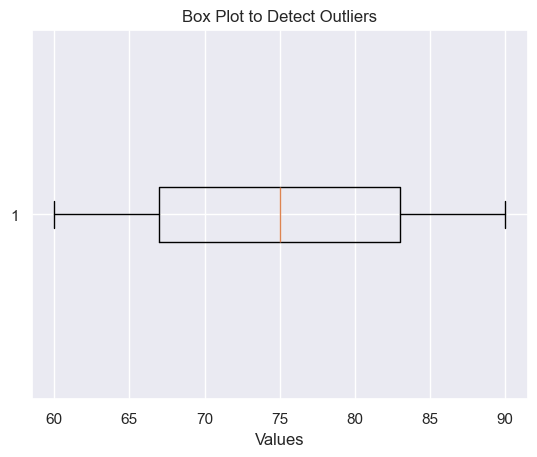

In [12]:
plt.boxplot(df['Age'], vert=False)
plt.title("Box Plot to Detect Outliers")
plt.xlabel("Values")
plt.show()

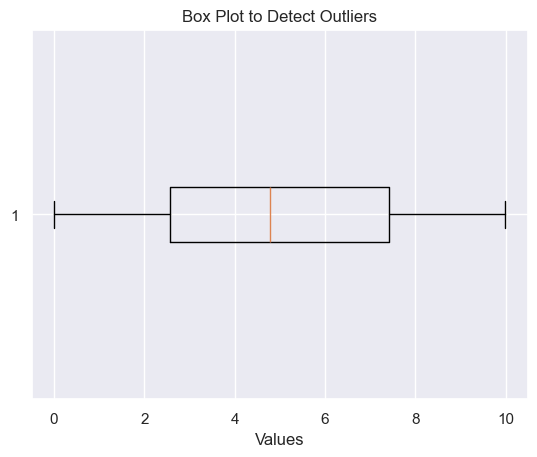

In [13]:

plt.boxplot(df['PhysicalActivity'], vert=False)
plt.title("Box Plot to Detect Outliers")
plt.xlabel("Values")
plt.show()

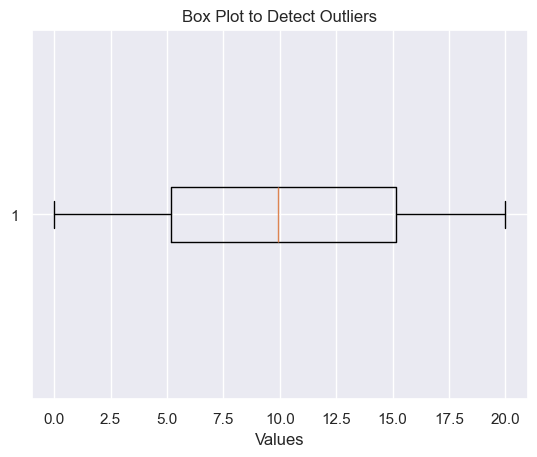

In [14]:
plt.boxplot(df['AlcoholConsumption'], vert=False)
plt.title("Box Plot to Detect Outliers")
plt.xlabel("Values")
plt.show()

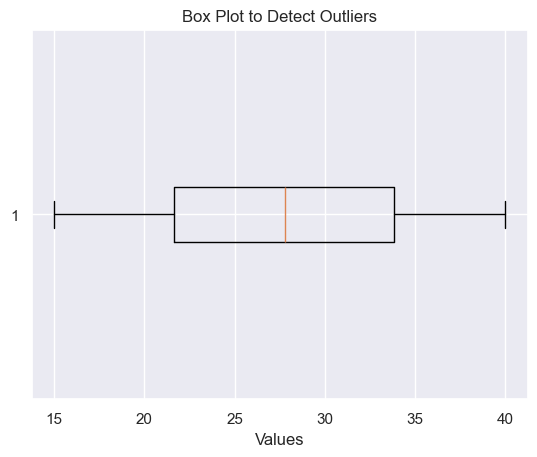

In [15]:
plt.boxplot(df['BMI'], vert=False)
plt.title("Box Plot to Detect Outliers")
plt.xlabel("Values")
plt.show()

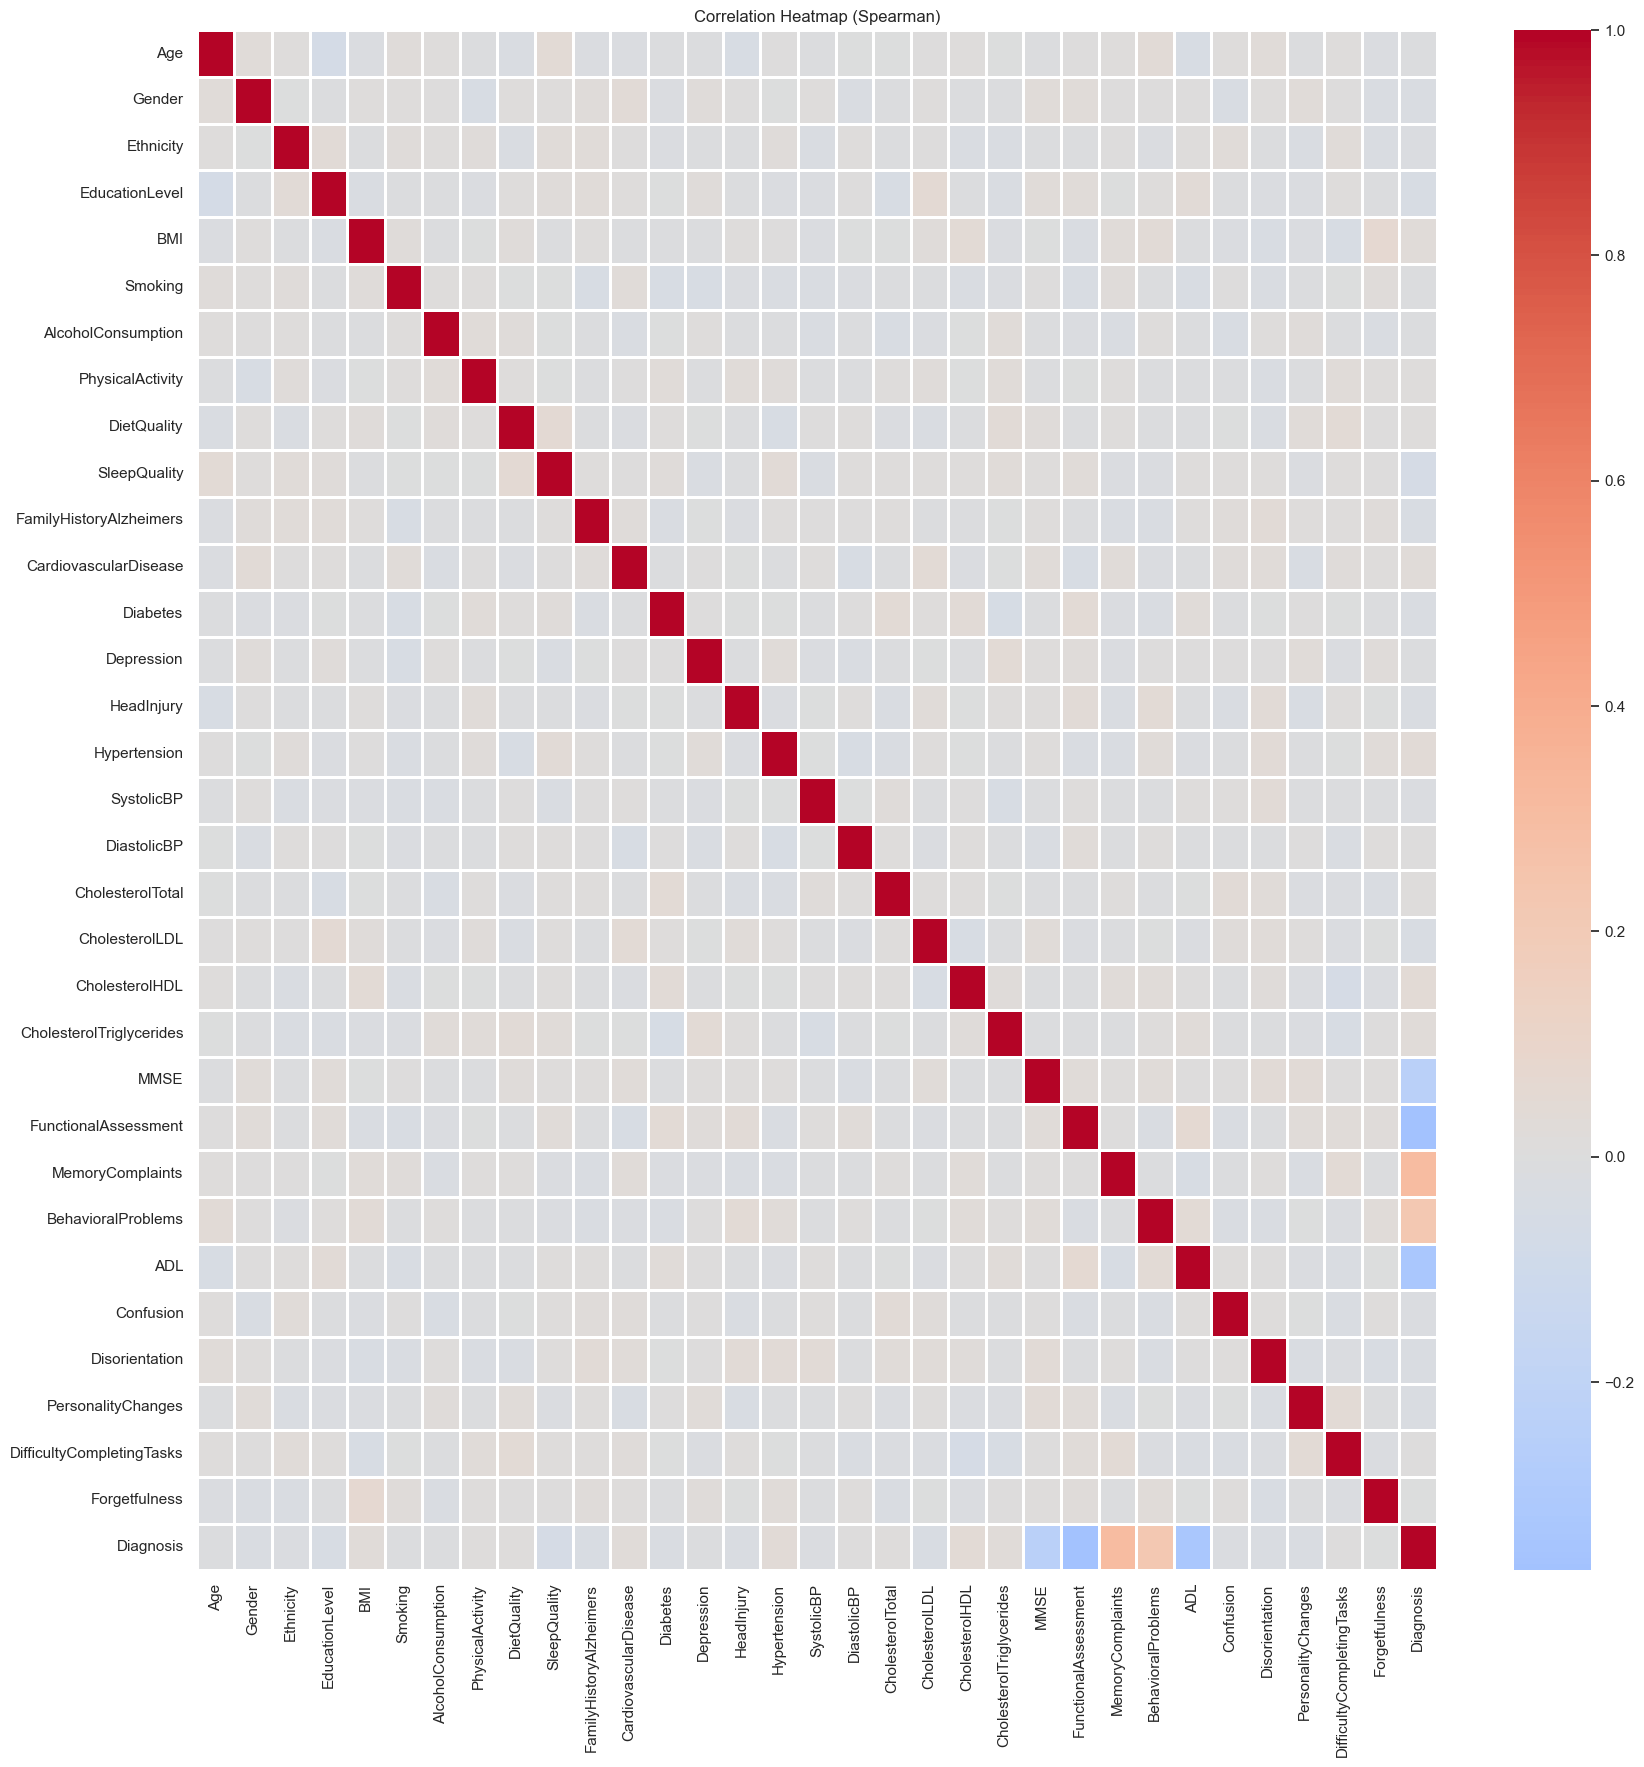

In [16]:
# Select only numeric columns (int and float)
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute Correlation Matrix using Spearman
correlation_matrix = numeric_df.corr(method='spearman')  # Change correlation type to Spearman

# Plot the Correlation Heatmap with custom color palette
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, linewidths=1)  # Using 'viridis' color map
plt.title("Correlation Heatmap (Spearman)")
plt.show()

Average age for each combination of diagnosis and gender.

In [17]:
grouped_data = df.groupby(['Diagnosis', 'Gender'])['Age'].mean()

print(grouped_data)

Diagnosis  Gender
0          0        74.44
           1        75.43
1          0        75.01
           1        74.67
Name: Age, dtype: float64


In [18]:
df.groupby('Ethnicity')['Diagnosis'].agg(["count","sum"])

,count,sum
Ethnicity,,
0,1278,463
1,454,146
2,206,84
3,211,67


In [19]:
df.groupby(['Gender','Ethnicity'])['Diagnosis'].agg(["count","sum"])

count  sum
Gender Ethnicity            
0      0            631  239
       1            224   72
       2             95   39
       3            110   36
1      0            647  224
       1            230   74
       2            111   45
       3            101   31

<h2>Understand the count of  diagnosis.</h2>

In [20]:
df['Diagnosis'].value_counts()

Diagnosis
0    1389
1     760
Name: count, dtype: int64

Overall, around 35% of status is patient of alzheimer.

<Axes: title={'center': 'Diagnosis Distribution'}, xlabel='Diagnosis'>

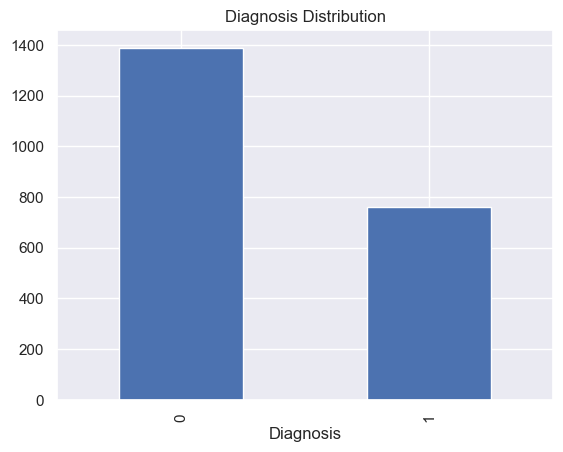

In [21]:
df['Diagnosis'].value_counts().plot(kind='bar', title='Diagnosis Distribution')

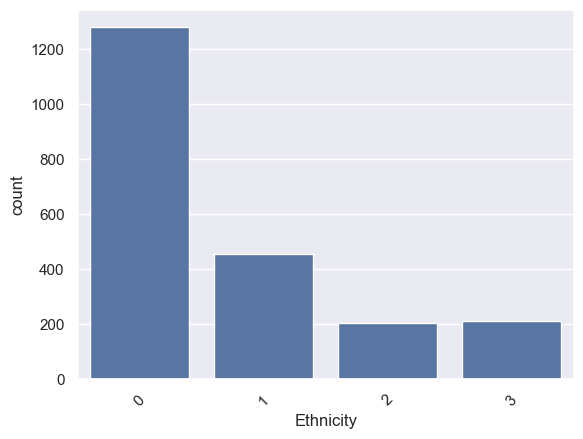

In [22]:
plt.xticks(rotation=45)
sns.countplot(data=df,x="Ethnicity")
plt.show()

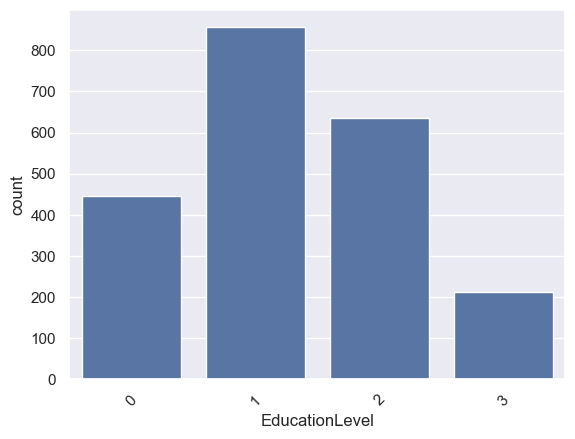

In [23]:
plt.xticks(rotation=45)
sns.countplot(data=df,x="EducationLevel")
plt.show()

What is Diagnosis Distribution by Education Level

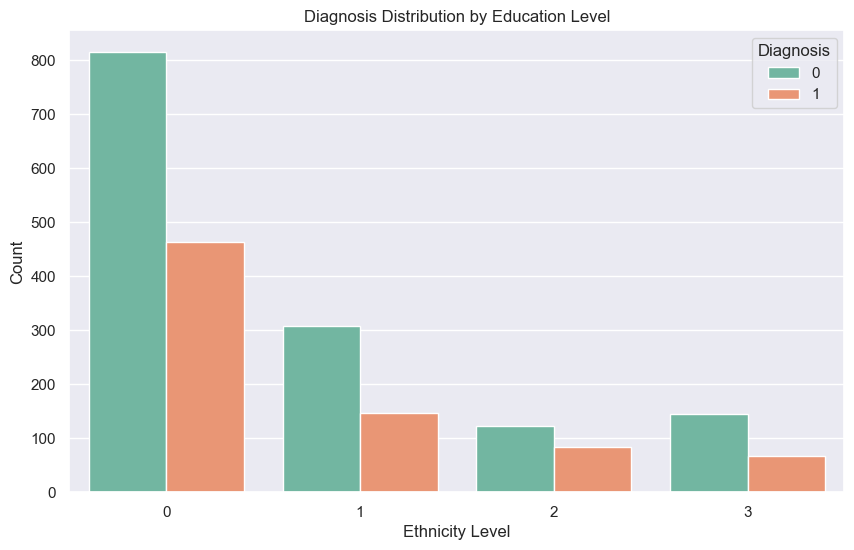

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='Ethnicity', hue='Diagnosis', palette='Set2')
plt.title('Diagnosis Distribution by Education Level')
plt.xlabel('Ethnicity Level')
plt.ylabel('Count')
plt.legend(title='Diagnosis')
plt.show()

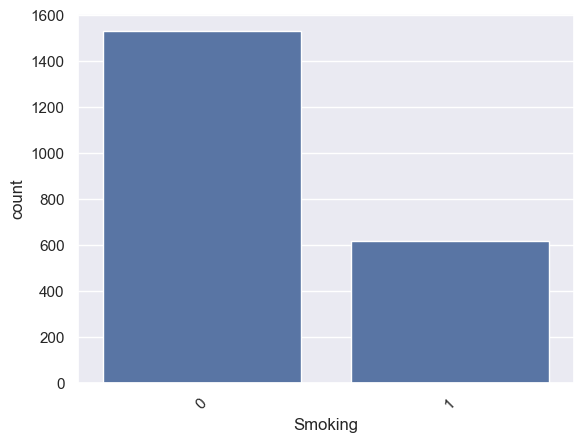

In [25]:
plt.xticks(rotation=45)
sns.countplot(data=df,x="Smoking")
plt.show()

Text(0.5, 1.0, 'correlation coffitiont between numirical columns')

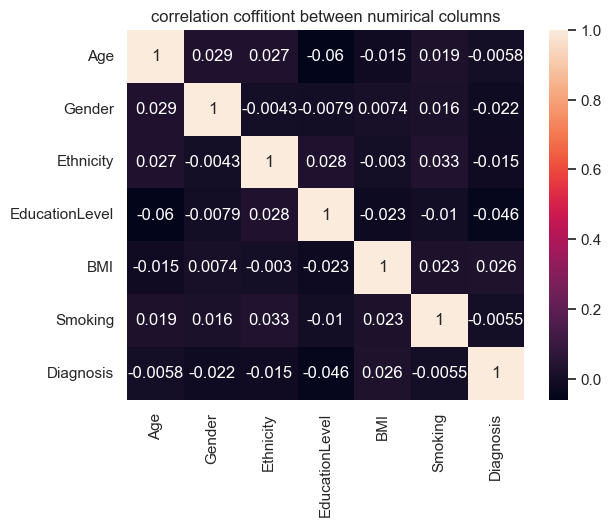

In [26]:
corr=df[['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'Diagnosis']]
sns.heatmap(corr.corr(),annot=True)
plt.title('correlation coffitiont between numirical columns')

In [27]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')

C:\Users\aaaa\AppData\Local\Temp\ipykernel_2748\2998307234.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df[col], palette='viridis')
C:\Users\aaaa\AppData\Local\Temp\ipykernel_2748\2998307234.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df[col], palette='viridis')
C:\Users\aaaa\AppData\Local\Temp\ipykernel_2748\2998307234.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df[col], palette='viridis')
C:\Users\aaaa\AppData\Local\Temp\ipykernel_2748\2998307234.py:7: FutureWarning: 

Passing `palette` without assi

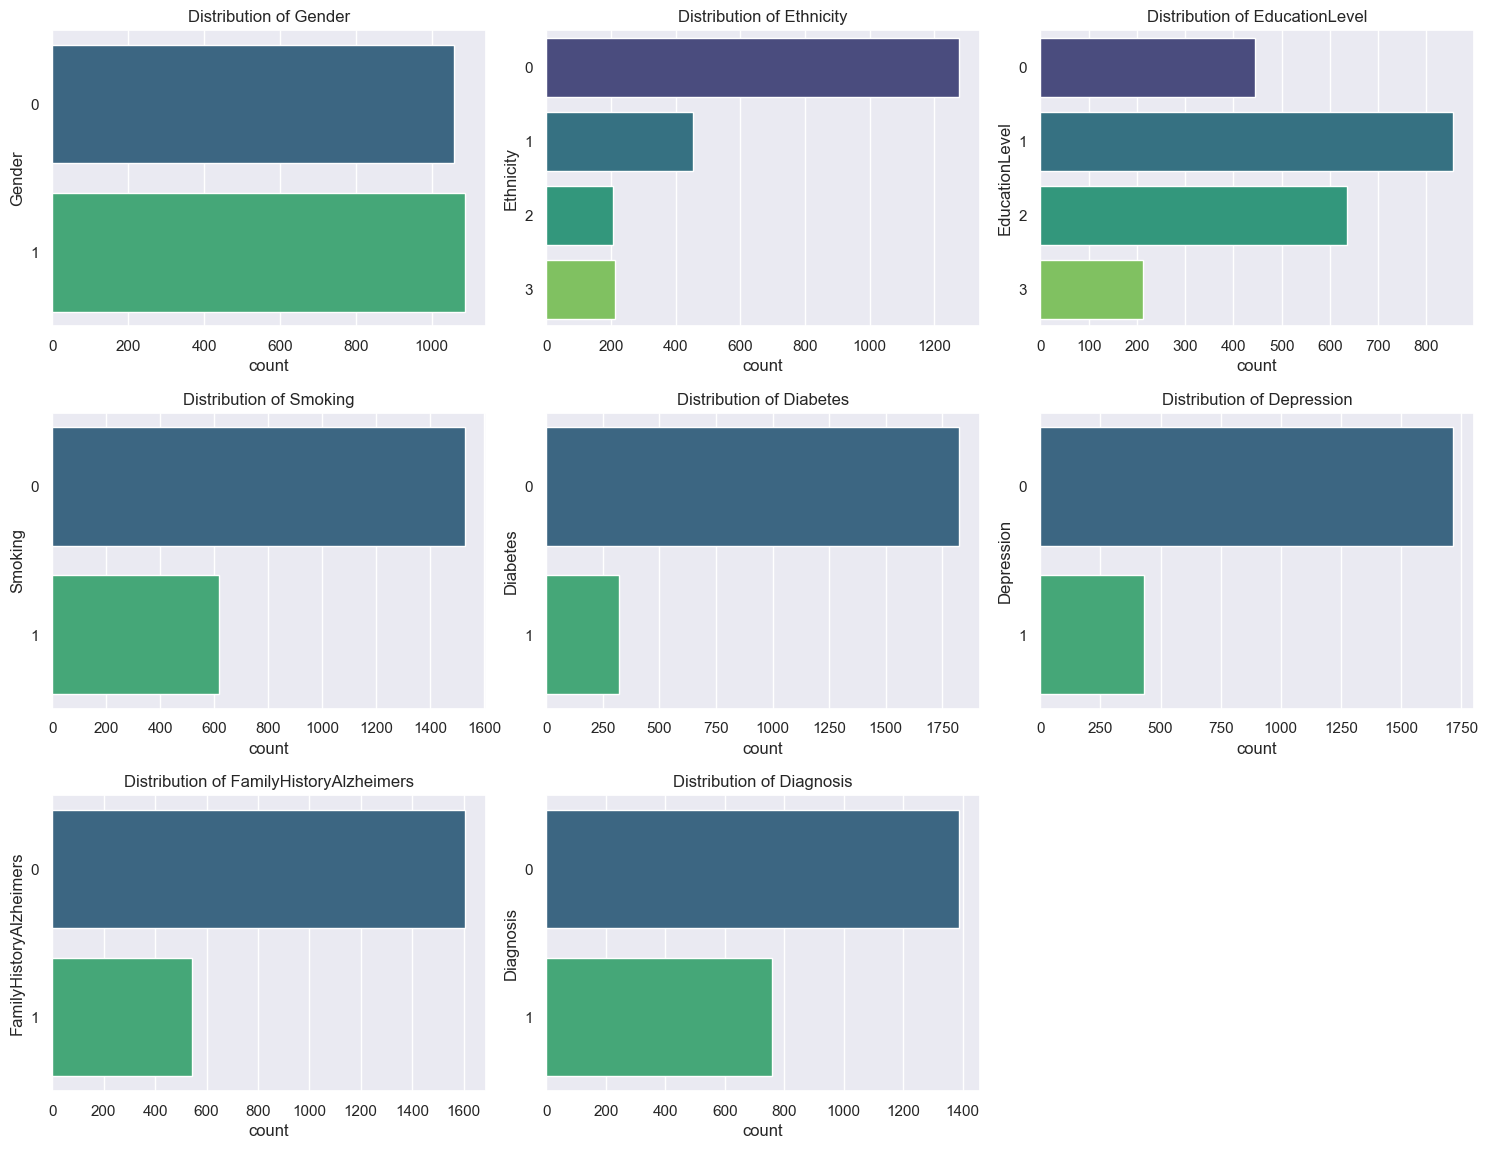

In [28]:
cols=['Gender','Ethnicity','EducationLevel','Smoking','Diabetes','Depression','FamilyHistoryAlzheimers','Diagnosis']

plt.figure(figsize=(15, 15))

for i, col in enumerate(cols, 1):
    plt.subplot(4, 3, i)
    sns.countplot(y = df[col], palette='viridis')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

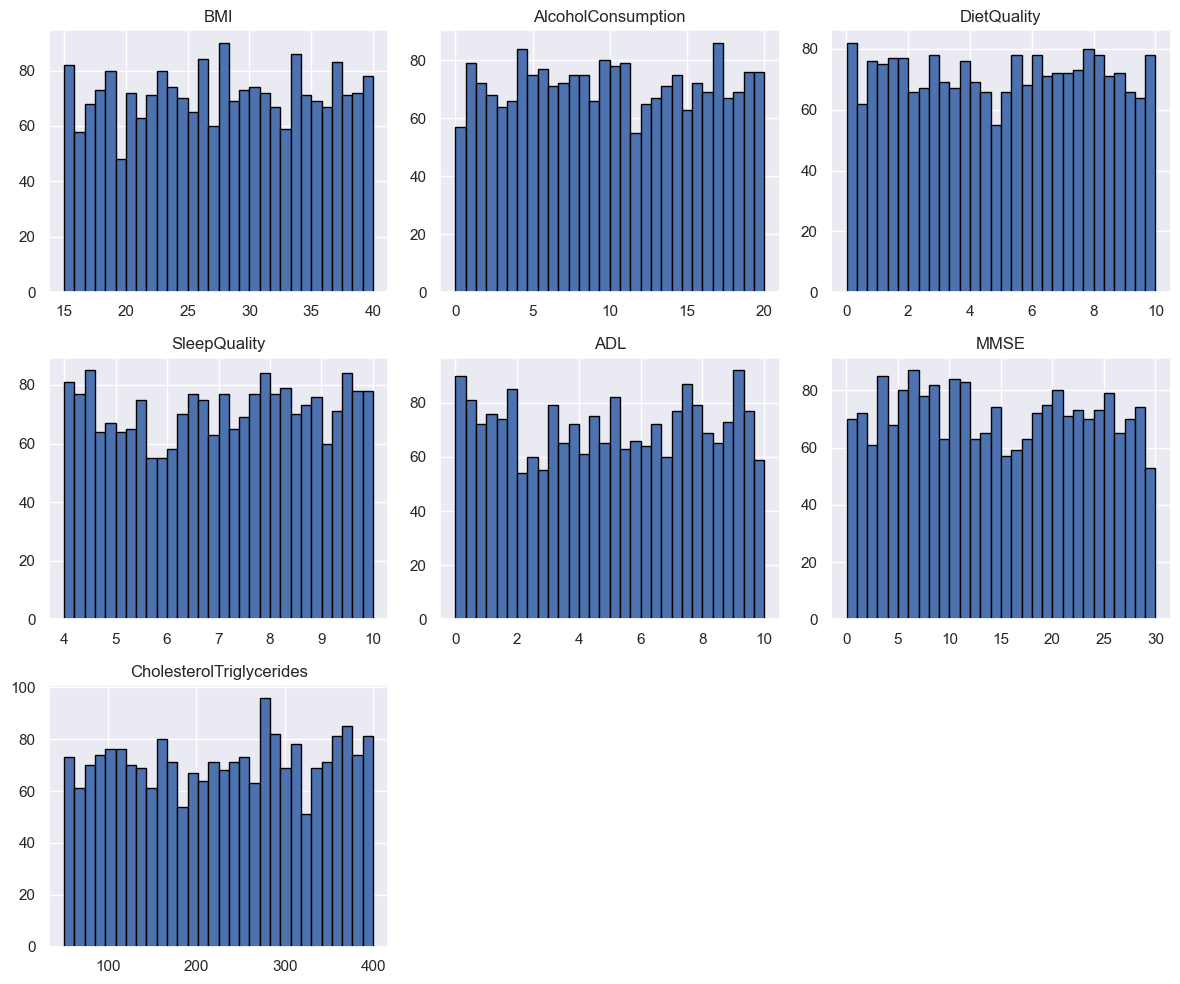

In [29]:
numerical_cols = ['BMI', 'AlcoholConsumption', 'DietQuality', 'SleepQuality', 'ADL', 'MMSE', 'CholesterolTriglycerides']
df[numerical_cols].hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

 What is the Age Distribution?

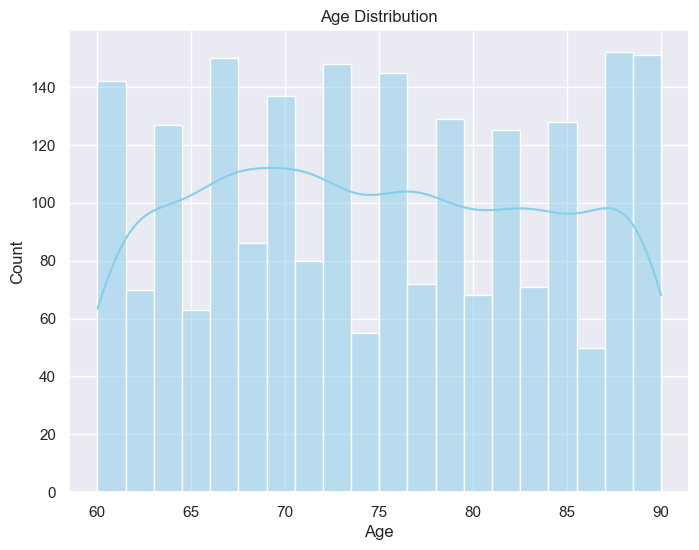

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

How is Alzheimer's Diagnosed by Age Group?

C:\Users\aaaa\AppData\Local\Temp\ipykernel_2748\3021069880.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(age_bins)['Diagnosis'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)


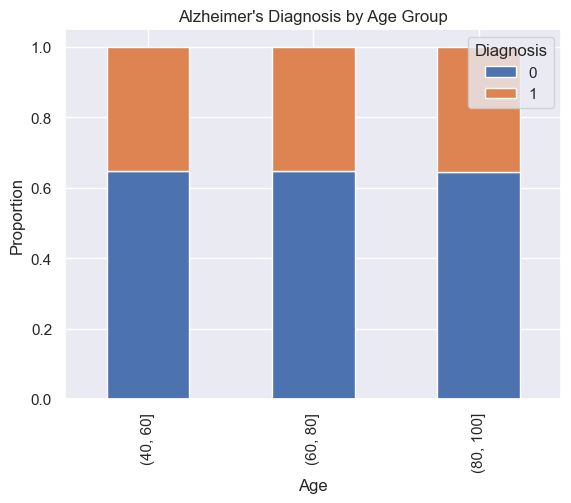

In [31]:
age_bins = pd.cut(df['Age'], bins=[40, 60, 80, 100])
df.groupby(age_bins)['Diagnosis'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title("Alzheimer's Diagnosis by Age Group")
plt.ylabel("Proportion")
plt.show()

Does Education Level Affect Diagnosis?

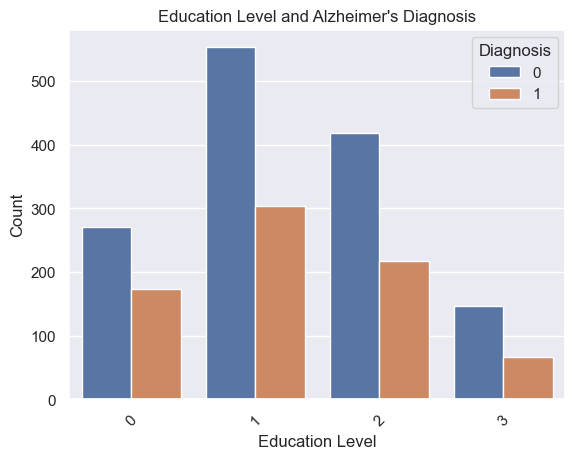

In [32]:
sns.countplot(data=df, x='EducationLevel', hue='Diagnosis')
plt.title("Education Level and Alzheimer's Diagnosis")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

 What is the Distribution of BMI?

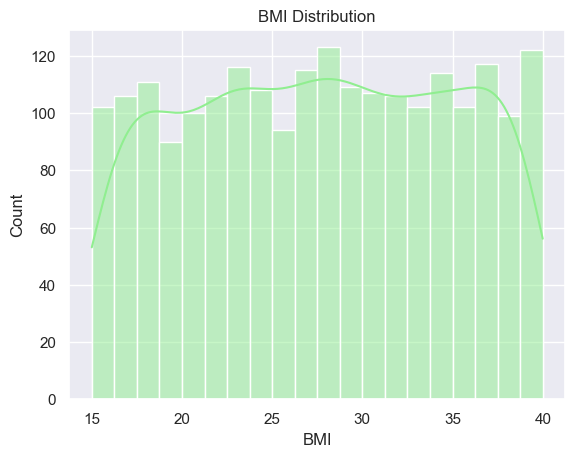

In [33]:
sns.histplot(df['BMI'], bins=20, kde=True, color='lightgreen')
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

How Does Smoking Relate to Diagnosis?

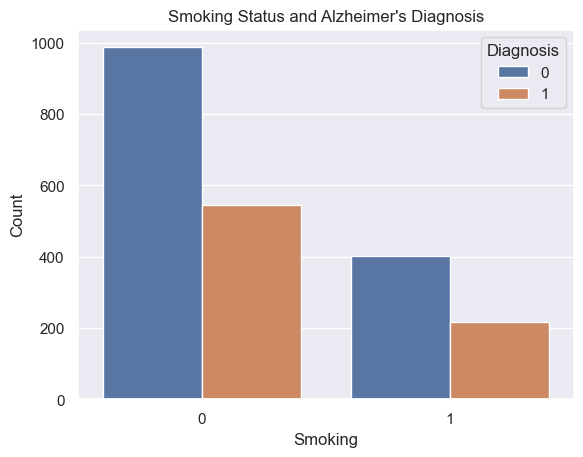

In [34]:
sns.countplot(data=df, x='Smoking', hue='Diagnosis')
plt.title("Smoking Status and Alzheimer's Diagnosis")
plt.xlabel("Smoking")
plt.ylabel("Count")
plt.show()


<h3>📝 Conclusions:</h3>
    smoking may not strongly affects of Alzheimer's diagnosis in this dataset

Family History's Role in Diagnosis?

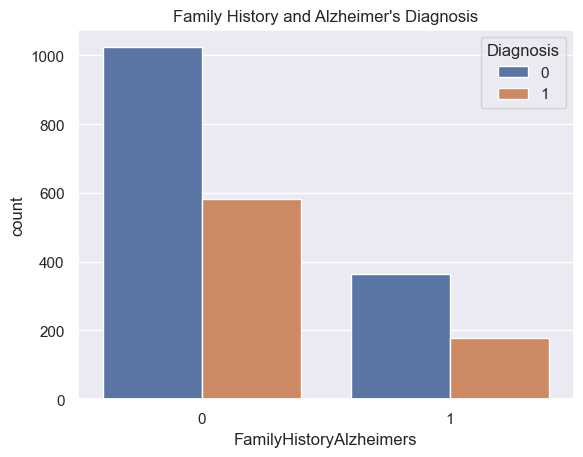

In [35]:
sns.countplot(data=df, x='FamilyHistoryAlzheimers', hue='Diagnosis')
plt.title("Family History and Alzheimer's Diagnosis")
plt.show()

<h3>📝 Conclusions:</h3>
family history of Alzheimer's does not significantly increase the likelihood of a diagnosis in this dataset.

 Does Depression Play a Role?


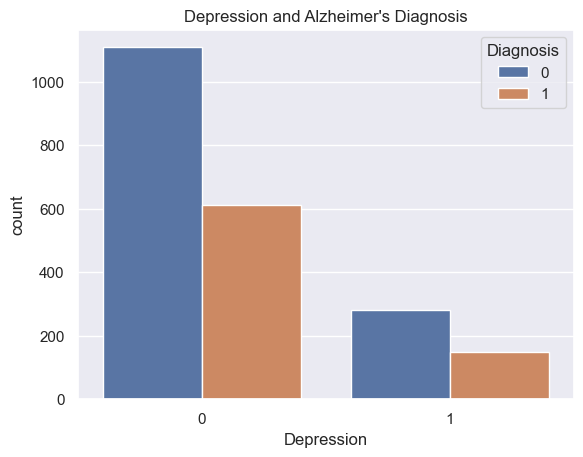

In [36]:
sns.countplot(data=df, x='Depression', hue='Diagnosis')
plt.title("Depression and Alzheimer's Diagnosis")
plt.show()

What influence does depression have on Alzheimer?

In [37]:
df.groupby(['Diagnosis', 'Depression']).size()

Diagnosis  Depression
0          0             1108
           1              281
1          0              610
           1              150
dtype: int64

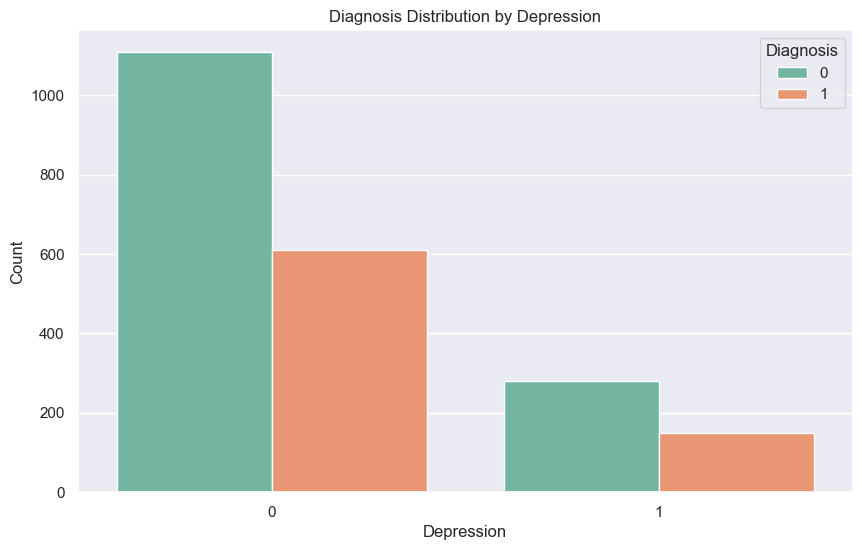

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='Depression', hue='Diagnosis', palette='Set2')
plt.title('Diagnosis Distribution by Depression')
plt.xlabel('Depression')
plt.ylabel('Count')
plt.legend(title='Diagnosis')
plt.show()

What is average SleepQuality for diagnosis ?

In [39]:
df.groupby(['Diagnosis'])['SleepQuality'].mean()

Diagnosis
0   7.12
1   6.91
Name: SleepQuality, dtype: float64

In [40]:
df['FamilyHistoryAlzheimers'].value_counts()

FamilyHistoryAlzheimers
0    1607
1     542
Name: count, dtype: int64

How many patients if the family have a history of Alzheimer’s disease ?

In [41]:
df.groupby(['Diagnosis', 'FamilyHistoryAlzheimers']).size()

Diagnosis  FamilyHistoryAlzheimers
0          0                          1024
           1                           365
1          0                           583
           1                           177
dtype: int64

<h3>📝 Conclusions:</h3>
individuals with no family history of Alzheimer have a higher absolute and proportion of Alzheimer's diagnoses<br>
compared to those with a family history in this dataset.

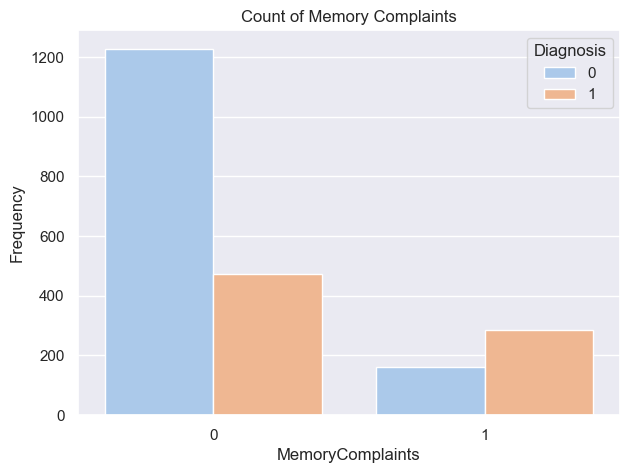

In [42]:
fig, axes = plt.subplots(figsize=(7, 5))

sns.countplot(x='MemoryComplaints', data=df, hue='Diagnosis', palette='pastel').set(title='Count of Memory Complaints')
plt.xlabel('MemoryComplaints')
plt.ylabel('Frequency')
plt.show()

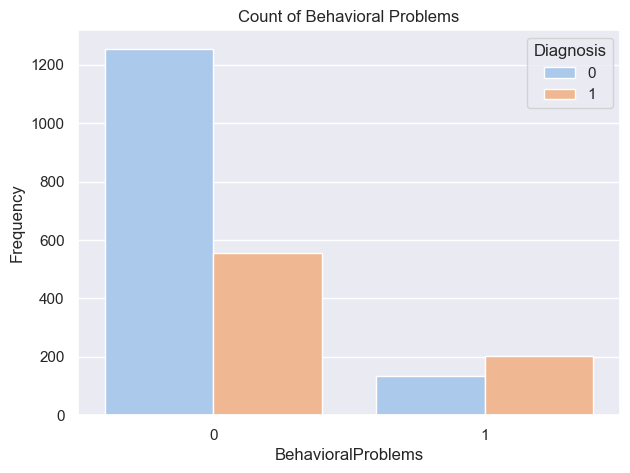

In [43]:
fig, axes = plt.subplots(figsize=(7, 5))

sns.countplot(x='BehavioralProblems', data=df, hue='Diagnosis', palette='pastel').set(title='Count of Behavioral Problems')
plt.xlabel('BehavioralProblems')
plt.ylabel('Frequency')
plt.show()

In [44]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.93,0,13.30,6.33,1.35,9.03,0,0,1,1,0,0,142.00,72.00,242.37,56.15,33.68,162.19,21.46,6.52,0,0,1.73,0,0,0,1,0,0
1,89,0,0,0,26.83,0,4.54,7.62,0.52,7.15,0,0,0,0,0,0,115.00,64.00,231.16,193.41,79.03,294.63,20.61,7.12,0,0,2.59,0,0,0,0,1,0
2,73,0,3,1,17.80,0,19.56,7.84,1.83,9.67,1,0,0,0,0,0,99.00,116.00,284.18,153.32,69.77,83.64,7.36,5.90,0,0,7.12,0,1,0,1,0,0
3,74,1,0,1,33.80,1,12.21,8.43,7.44,8.39,0,0,0,0,0,0,118.00,115.00,159.58,65.37,68.46,277.58,13.99,8.97,0,1,6.48,0,0,0,0,0,0
4,89,0,0,0,20.72,0,18.45,6.31,0.80,5.60,0,0,0,0,0,0,94.00,117.00,237.60,92.87,56.87,291.20,13.52,6.05,0,0,0.01,0,0,1,1,0,0


<h3>does head injury effect on diagnosis ?<h3>

In [45]:
health_injury = df.groupby(['Diagnosis','HeadInjury']).size()
print(health_injury)

Diagnosis  HeadInjury
0          0             1255
           1              134
1          0              696
           1               64
dtype: int64


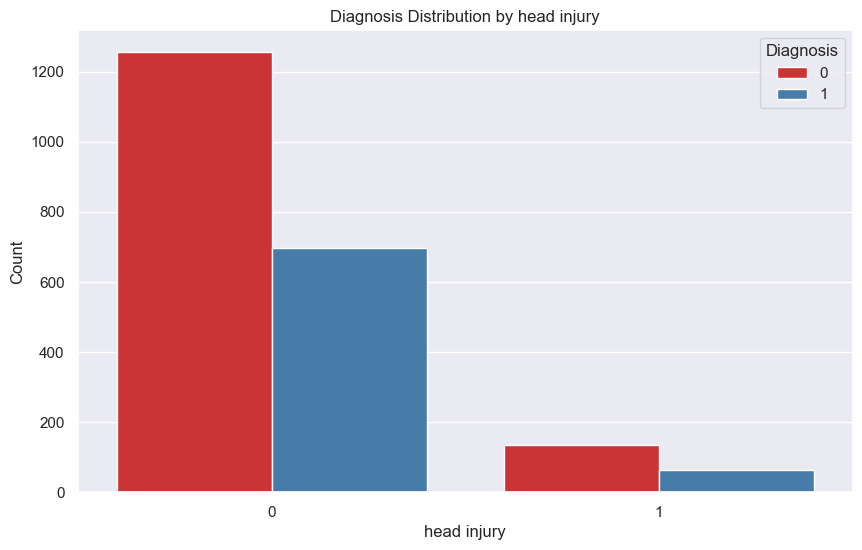

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='HeadInjury', hue='Diagnosis', palette='Set1')
plt.title('Diagnosis Distribution by head injury')
plt.xlabel('head injury')
plt.ylabel('Count')
plt.legend(title='Diagnosis')
plt.show()

<h3>📝 Conclusions:</h3>
the proportion of Alzheimer's diagnoses is higher among individuals without a history of head injury <br>
compared to those with a history of head injury.

<h3>does hypertention effect on diagnosis ?<h3>

In [47]:
health_injury = df.groupby(['Diagnosis','Hypertension']).size()
print(health_injury)

Diagnosis  Hypertension
0          0               1195
           1                194
1          0                634
           1                126
dtype: int64


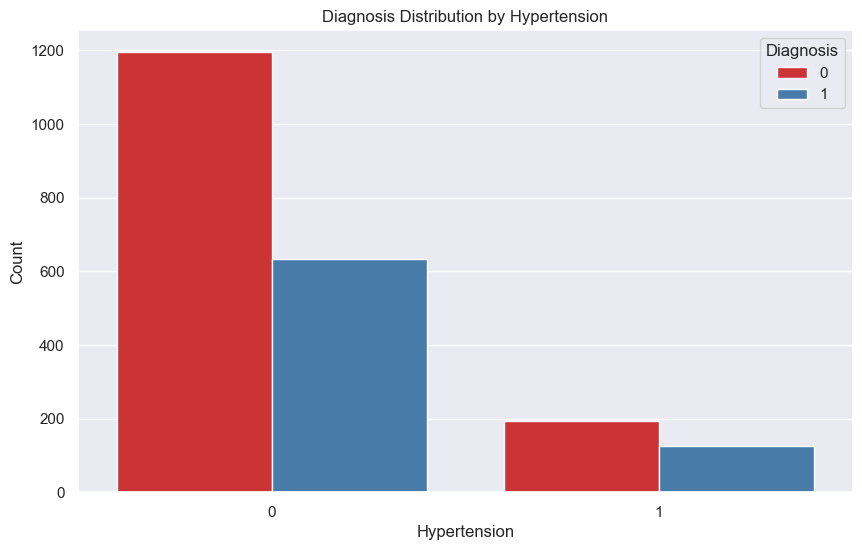

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Hypertension', hue='Diagnosis', palette='Set1')
plt.title('Diagnosis Distribution by Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.legend(title='Diagnosis')
plt.show()


<h3>What is the Distribution of SystolicBP ?<h3>

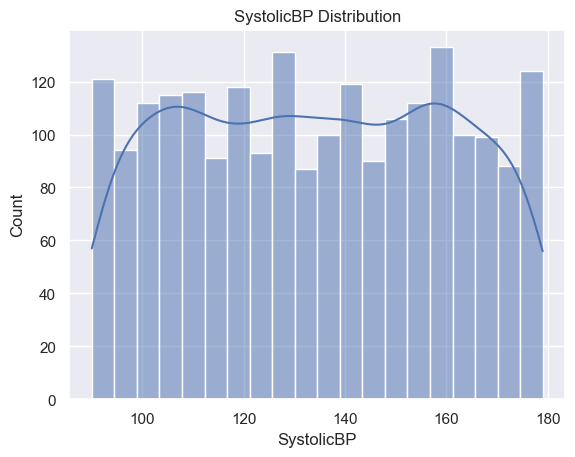

In [49]:
sns.histplot(df['SystolicBP'], bins=20, kde=True)
plt.title("SystolicBP Distribution")
plt.xlabel("SystolicBP")
plt.ylabel("Count")
plt.show()

<h3>What is the Distribution of DiastolicBP ?<h3>

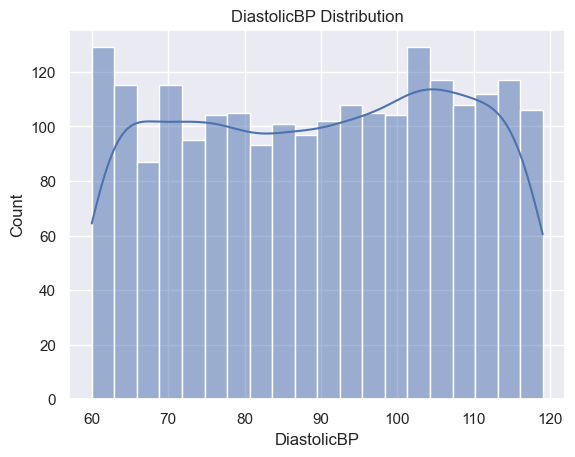

In [50]:
sns.histplot(df['DiastolicBP'], bins=20, kde=True)
plt.title("DiastolicBP Distribution")
plt.xlabel("DiastolicBP")
plt.ylabel("Count")
plt.show()

<h3>What is the Distribution of all blood pressure ?<h3>

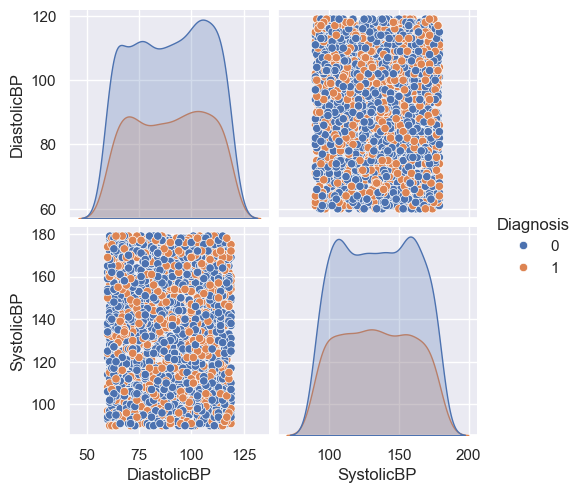

In [51]:
sns.pairplot(df, hue='Diagnosis', vars=['DiastolicBP', 'SystolicBP'])
plt.show()

Text(0, 0.5, 'Systolic Blood Pressure')

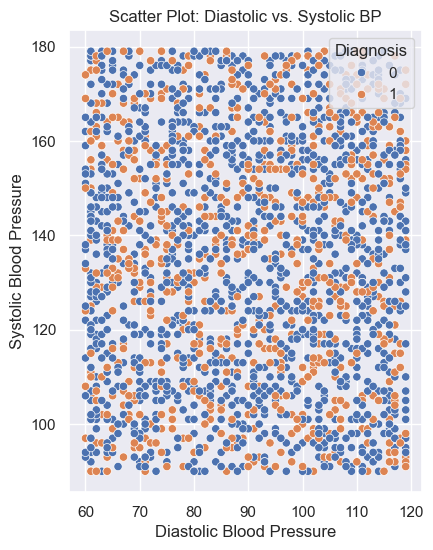

In [52]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df, x="DiastolicBP", y="SystolicBP", hue="Diagnosis"
)
plt.title("Scatter Plot: Diastolic vs. Systolic BP")
plt.xlabel("Diastolic Blood Pressure")
plt.ylabel("Systolic Blood Pressure")


<h3>whats the didtribution of all cholesterol ?<h3> 

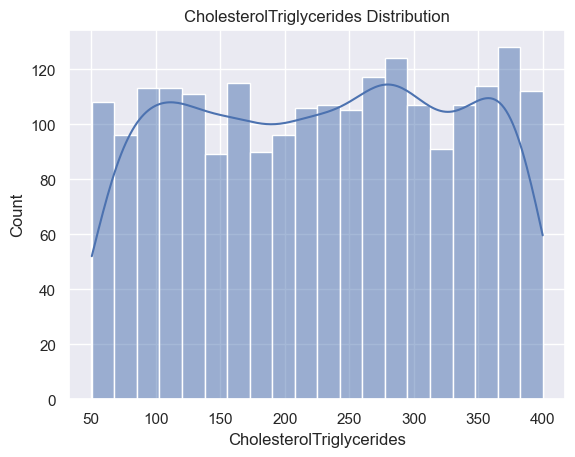

In [53]:
sns.histplot(df['CholesterolTriglycerides'], bins=20, kde=True)
plt.title("CholesterolTriglycerides Distribution")
plt.xlabel("CholesterolTriglycerides")
plt.ylabel("Count")
plt.show()

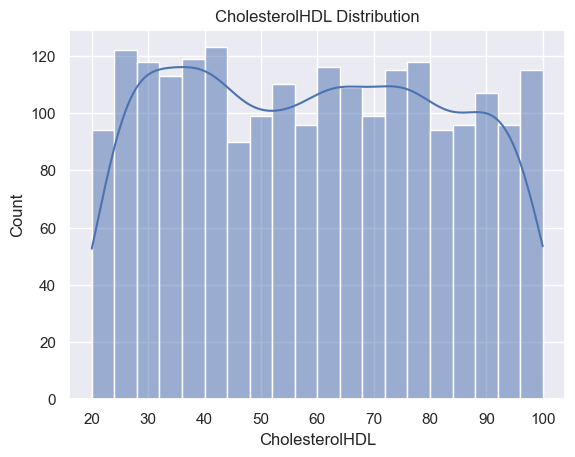

In [54]:
sns.histplot(df['CholesterolHDL'], bins=20, kde=True)
plt.title("CholesterolHDL Distribution")
plt.xlabel("CholesterolHDL")
plt.ylabel("Count")
plt.show()

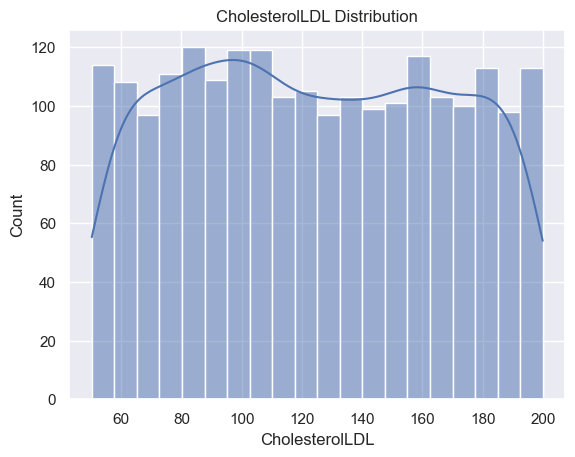

In [55]:
sns.histplot(df['CholesterolLDL'], bins=20, kde=True)
plt.title("CholesterolLDL Distribution")
plt.xlabel("CholesterolLDL")
plt.ylabel("Count")
plt.show()

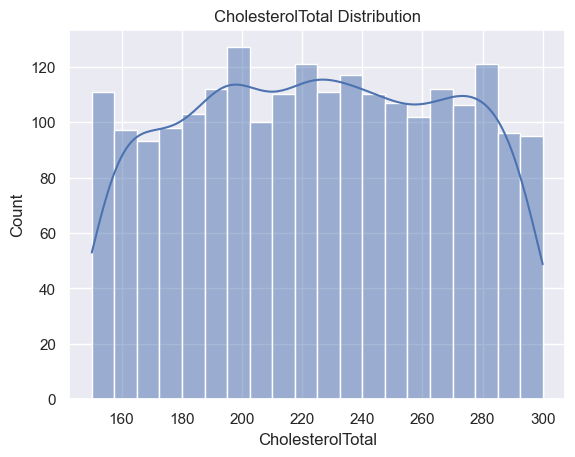

In [56]:
sns.histplot(df['CholesterolTotal'], bins=20, kde=True)
plt.title("CholesterolTotal Distribution")
plt.xlabel("CholesterolTotal")
plt.ylabel("Count")
plt.show()

In [57]:
df_normalized = df.copy()
cholesterol_cols = [
    'CholesterolTotal',
    'CholesterolLDL',
    'CholesterolHDL',
    'CholesterolTriglycerides'
]

# Normalize to [0, 1] range
df_normalized[cholesterol_cols] = df[cholesterol_cols].apply(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# Take an average for each diagnosis group
mean_cholesterol = df_normalized.groupby('Diagnosis')[cholesterol_cols].mean().reset_index()
print(mean_cholesterol)

   Diagnosis  CholesterolTotal  CholesterolLDL  CholesterolHDL  \
0          0              0.50            0.50            0.48   
1          1              0.50            0.48            0.51   

   CholesterolTriglycerides  
0                      0.50  
1                      0.52  


<h3>Does the FunctionalAssessment effect on Diagnosis?</h3>

In [58]:
df.groupby(['Diagnosis'])['FunctionalAssessment'].value_counts(normalize=True)

Diagnosis  FunctionalAssessment
0          5.08                   0.00
           0.01                   0.00
           0.02                   0.00
           0.04                   0.00
           0.04                   0.00
           0.07                   0.00
           0.08                   0.00
           0.09                   0.00
           0.10                   0.00
           0.11                   0.00
           0.11                   0.00
           0.12                   0.00
           0.13                   0.00
           0.14                   0.00
           0.14                   0.00
           0.16                   0.00
           0.16                   0.00
           0.18                   0.00
           0.22                   0.00
           0.22                   0.00
           0.23                   0.00
           0.24                   0.00
           0.24                   0.00
           0.25                   0.00
           0.25                 

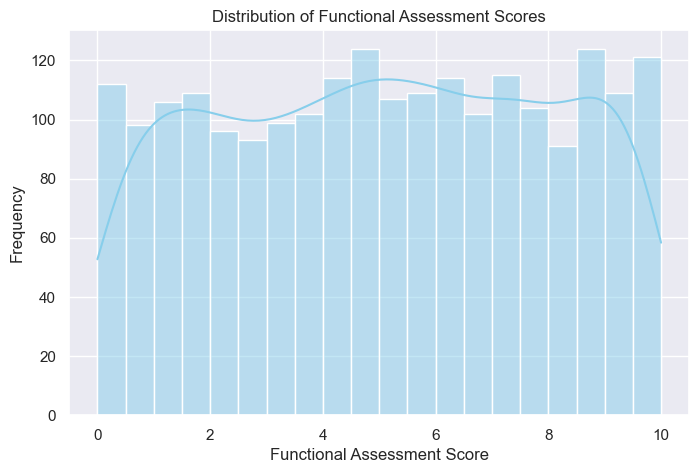

In [59]:
#Dis of Continous values
plt.figure(figsize=(8, 5))
sns.histplot(df['FunctionalAssessment'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Functional Assessment Scores')
plt.xlabel('Functional Assessment Score')
plt.ylabel('Frequency')
plt.show()


<h3>range of FunctionalAssessment Frequency for maximum values is 4 - 6 is Medium impact</h3>

<h3>Does MemoryComplaints effect on diagnosis ?<h3>

In [60]:
MemoryComplaints = df.groupby(['Diagnosis','MemoryComplaints']).size()
print(MemoryComplaints)

Diagnosis  MemoryComplaints
0          0                   1228
           1                    161
1          0                    474
           1                    286
dtype: int64


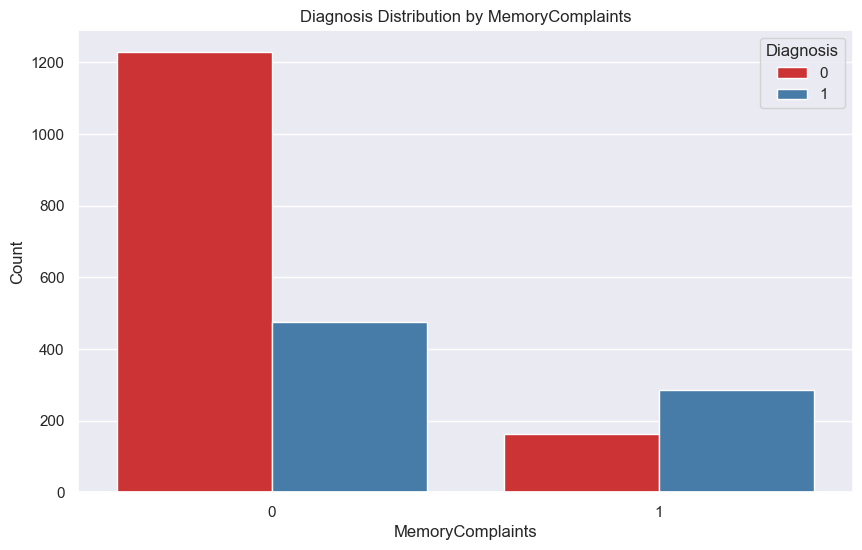

In [61]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='MemoryComplaints', hue='Diagnosis', palette='Set1')
plt.title('Diagnosis Distribution by MemoryComplaints')
plt.xlabel('MemoryComplaints')
plt.ylabel('Count')
plt.legend(title='Diagnosis')
plt.show()


<p>if MemoryComplaints is no effect, Diagnosis is no exists</p>

<h3>does BehavioralProblems effect on diagnosis ?<h3>

In [62]:
BehavioralProblems = df.groupby(['Diagnosis','BehavioralProblems']).size()
print(BehavioralProblems)

Diagnosis  BehavioralProblems
0          0                     1255
           1                      134
1          0                      557
           1                      203
dtype: int64


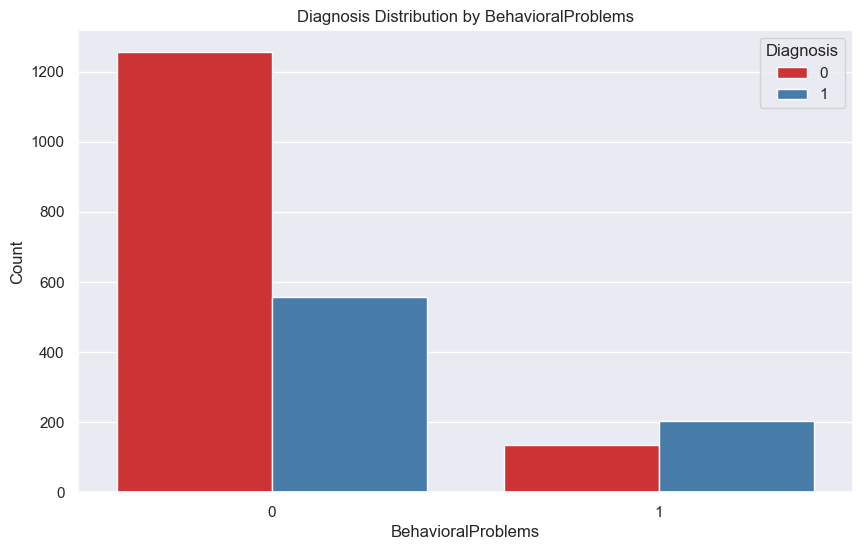

In [63]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='BehavioralProblems', hue='Diagnosis', palette='Set1')
plt.title('Diagnosis Distribution by BehavioralProblems')
plt.xlabel('BehavioralProblems')
plt.ylabel('Count')
plt.legend(title='Diagnosis')
plt.show()


<p>if BehavioralProblems is no effect, Diagnosis is no exists</p>

<h3>does ADL effect on diagnosis ?<h3>

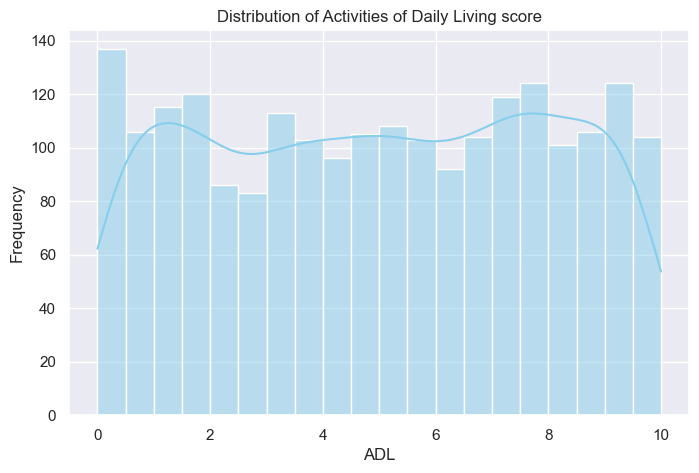

In [64]:
#Dis of Continous values
plt.figure(figsize=(8, 5))
sns.histplot(df['ADL'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Activities of Daily Living score')
plt.xlabel('ADL')
plt.ylabel('Frequency')
plt.show()


<p>Because Lower scores is maximum values, this indicate greater impairment on Diagnosis<p>

<h3>does Confusion effect on diagnosis ?<h3>

In [65]:
Confusion = df.groupby(['Diagnosis','Confusion']).size()
print(Confusion)

Diagnosis  Confusion
0          0            1096
           1             293
1          0             612
           1             148
dtype: int64


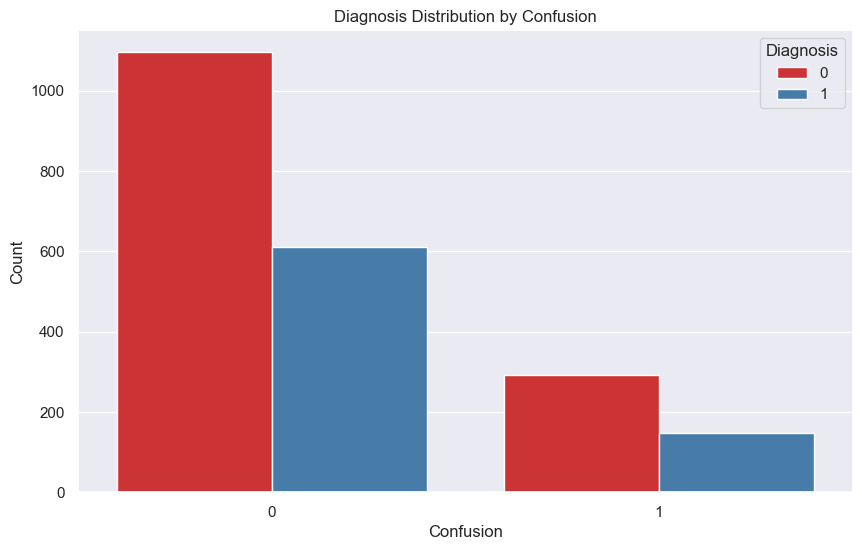

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Confusion', hue='Diagnosis', palette='Set1')
plt.title('Diagnosis Distribution by Confusion')
plt.xlabel('Confusion')
plt.ylabel('Count')
plt.legend(title='Diagnosis')
plt.show()

<p>From Box Blot, the effect of Confusion on Diagnosis, Confusion is small, the Diagnosis is no exists</p>

<h3>does Disorientation effect on diagnosis ?<h3>

In [67]:
Disorientation = df.groupby(['Diagnosis','Disorientation']).size()
print(Disorientation)

Diagnosis  Disorientation
0          0                 1160
           1                  229
1          0                  649
           1                  111
dtype: int64


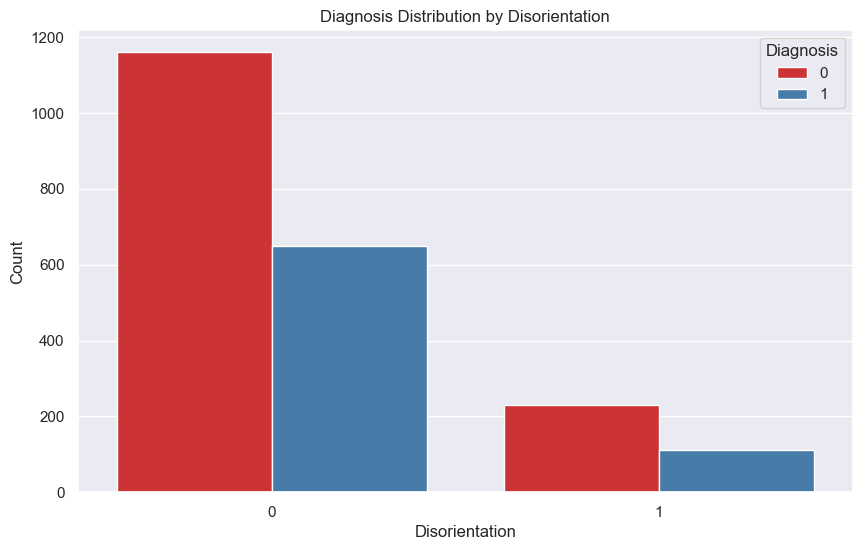

In [68]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Disorientation', hue='Diagnosis', palette='Set1')
plt.title('Diagnosis Distribution by Disorientation')
plt.xlabel('Disorientation')
plt.ylabel('Count')
plt.legend(title='Diagnosis')
plt.show()

<p>From Box Blot, the effect of Disorientation on Diagnosis, Disorientation is small, the Diagnosis is no exists</p>

<h3>does PersonalityChanges effect on diagnosis ?<h3>

In [69]:
PersonalityChanges = df.groupby(['Diagnosis', 'PersonalityChanges']).size()
print(PersonalityChanges)

Diagnosis  PersonalityChanges
0          0                     1172
           1                      217
1          0                      653
           1                      107
dtype: int64


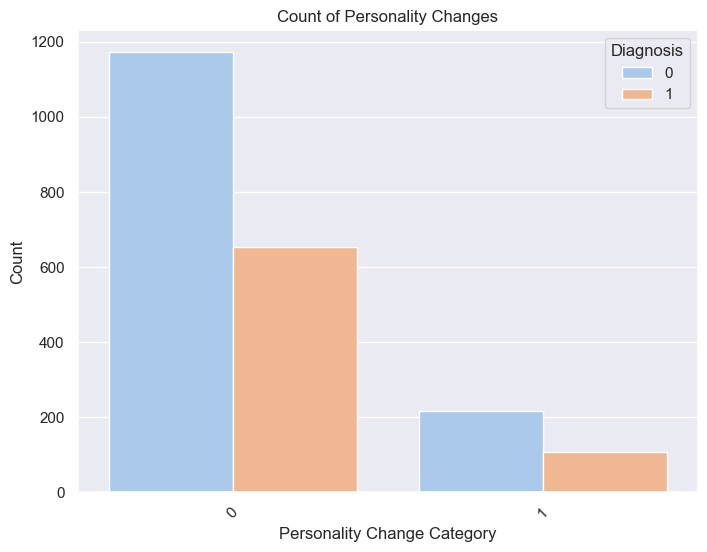

In [70]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='PersonalityChanges', hue='Diagnosis', palette='pastel')
plt.title('Count of Personality Changes')
plt.xlabel('Personality Change Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<p>range of zero PersonalityChanges is maximum, is no effect on Diagnosis</p>

<h3>does DifficultyCompletingTasks effect on diagnosis ?<h3>

In [71]:
DifficultyCompletingTasks = df.groupby(['Diagnosis', 'DifficultyCompletingTasks']).size()
print(DifficultyCompletingTasks)

Diagnosis  DifficultyCompletingTasks
0          0                            1172
           1                             217
1          0                             638
           1                             122
dtype: int64


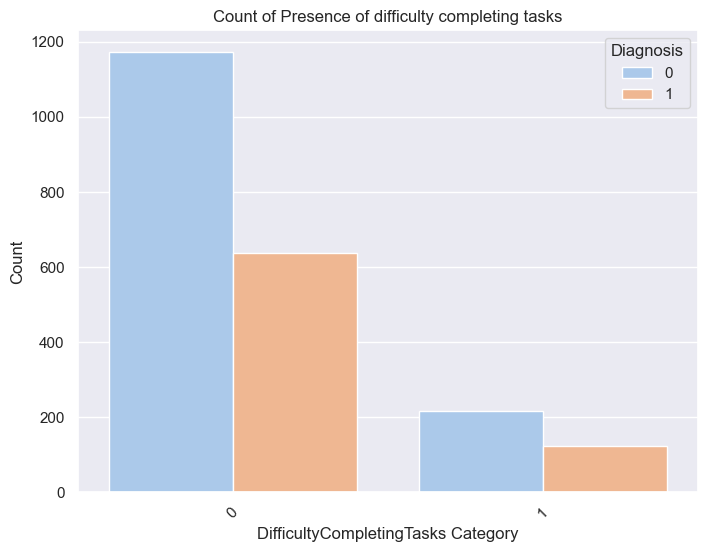

In [72]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='DifficultyCompletingTasks', hue='Diagnosis', palette='pastel')
plt.title('Count of Presence of difficulty completing tasks')
plt.xlabel('DifficultyCompletingTasks Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<h3>does Forgetfulness effect on diagnosis?<h3>

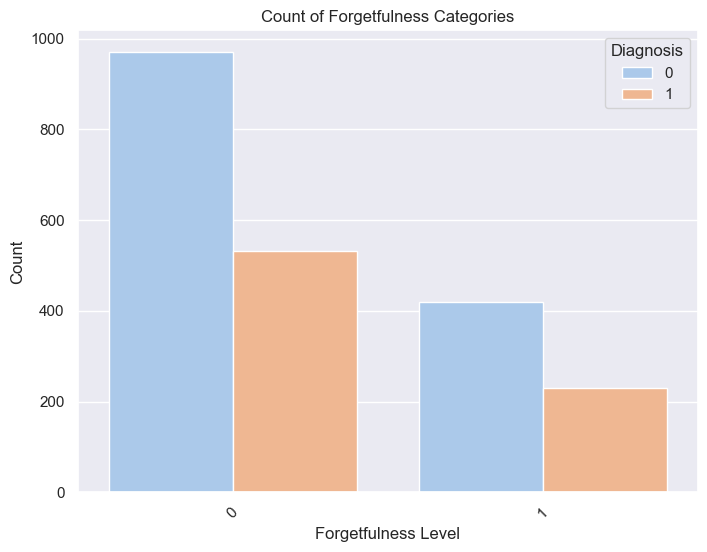

In [73]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Forgetfulness', hue='Diagnosis', data=df, palette='pastel')
plt.title('Count of Forgetfulness Categories')
plt.xlabel('Forgetfulness Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [74]:

X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

if y.dtype == 'O':
    y = LabelEncoder().fit_transform(y)


numeric_features = X.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9372093023255814
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       277
           1       0.96      0.86      0.91       153

    accuracy                           0.94       430
   macro avg       0.94      0.92      0.93       430
weighted avg       0.94      0.94      0.94       430

